# Analitiche con Pandas - 1. introduzione


## [Scarica zip esercizi](../_static/generated/pandas.zip)

[Naviga file online](https://github.com/DavidLeoni/softpython-it/tree/master/pandas)


Python mette a disposizione degli strumenti potenti per l'analisi dei dati - uno dei principali è [Pandas](https://pandas.pydata.org/), che fornisce strutture di dati veloci e flessibili, soprattutto per l'analisi dei dati in tempo reale. Pandas riusa librerie esistenti che abbiamo già visto come Numpy:

![pydata-8243](pydata.png)


In questo tutorial vedremo:

* analisi dati con Pandas
* plotting con MatPlotLib
* Esempi con dataset AstroPi
* Esercizi con dataset meteotrentino
* mappa regioni italiane con GeoPandas

## 1. Che fare


- scompatta lo zip in una cartella, dovresti ottenere qualcosa del genere: 

```
pandas
    pandas1.ipynb     
    pandas1-sol.ipynb
    pandas2.ipynb
    pandas2-sol.ipynb
    pandas3-chal.ipynb
    jupman.py 
    
```

<div class="alert alert-warning">

**ATTENZIONE**: Per essere visualizzato correttamente, il file del notebook DEVE essere nella cartella szippata.
</div>

- apri il Jupyter Notebook da quella cartella. Due cose dovrebbero aprirsi, prima una console e poi un browser. Il browser dovrebbe mostrare una lista di file: naviga la lista e apri il notebook `pandas1.ipynb`
- Prosegui leggendo il file degli esercizi, ogni tanto al suo interno troverai delle scritte **ESERCIZIO**, che ti chiederanno di scrivere dei comandi Python nelle celle successive. 

Scorciatoie da tastiera:

* Per eseguire il codice Python dentro una cella di Jupyter, premi `Control+Invio`
* Per eseguire il codice Python dentro una cella di Jupyter E selezionare la cella seguente, premi `Shift+Invio`
* Per eseguire il codice Python dentro una cella di Jupyter E creare una nuova cella subito dopo, premi `Alt+Invio`
* Se per caso il Notebook sembra inchiodato, prova a selezionare `Kernel -> Restart`




### Controlla l'installazione

Prima di tutto vediamo se hai già installato pandas sul tuo sistema, prova ad eseguire questa cella con Ctrl-Enter:

In [1]:
import pandas as pd

Se non hai visto messaggi di errore, puoi saltare l'installazione, altrimenti fai così:

* Se hai Anaconda - apri l'Anaconda Prompt e metti:

`conda install pandas`

* Senza Anaconda: (`--user` installa nella propria home):


`python3 -m pip install --user pandas`


## 2. Analisi dei dati di Astro Pi


Proviamo ad analizzare i dati registrati da una scheda elettronica RaspberryPi presente sulla Stazione Spaziale Internazionale, scaricati da qui:

[https://projects.raspberrypi.org/en/projects/astro-pi-flight-data-analysis](https://projects.raspberrypi.org/en/projects/astro-pi-flight-data-analysis)

Nel sito è possibile trovare la descrizione dettagliata dei dati raccolti dai sensori, nel mese di febbraio 2016 (un record ogni 10 secondi).

![iss-2985744](International_Space_Station_exploded_diagram_large.jpg)

**Importiamo il file**

Il metodo ```read_csv``` importa i dati da un file CSV e li memorizza in una struttura DataFrame.

In questo esercizio useremo il file [Columbus_Ed_astro_pi_datalog.csv](Columbus_Ed_astro_pi_datalog.csv)

In [2]:
import pandas as pd   # importiamo pandas e per comodità lo rinominiamo in  'pd'
import numpy as np    # importiamo numpy e per comodità lo rinominiamo in 'np'

# ricordatevi l'encoding !
df = pd.read_csv('Columbus_Ed_astro_pi_datalog.csv', encoding='UTF-8')  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      110869 non-null  int64  
 1   temp_cpu    110869 non-null  float64
 2   temp_h      110869 non-null  float64
 3   temp_p      110869 non-null  float64
 4   humidity    110869 non-null  float64
 5   pressure    110869 non-null  float64
 6   pitch       110869 non-null  float64
 7   roll        110869 non-null  float64
 8   yaw         110869 non-null  float64
 9   mag_x       110869 non-null  float64
 10  mag_y       110869 non-null  float64
 11  mag_z       110869 non-null  float64
 12  accel_x     110869 non-null  float64
 13  accel_y     110869 non-null  float64
 14  accel_z     110869 non-null  float64
 15  gyro_x      110869 non-null  float64
 16  gyro_y      110869 non-null  float64
 17  gyro_z      110869 non-null  float64
 18  reset       110869 non-null  int64  
 19  ti

Possiamo vedere rapidamente righe e colonne del dataframe con l'attributo `shape`:

**NOTA**: `shape` non è seguito da parentesi tonde !

In [3]:
df.shape

(110869, 20)

Il metodo `describe` vi da al volo tutta una serie di dati di riepilogo:

* il conteggio delle righe
* la media
* [la deviazione standard](https://it.wikipedia.org/wiki/Scarto_quadratico_medio)
* [i quartili](https://it.wikipedia.org/wiki/Quantile)
* minimo e massimo

In [4]:
df.describe()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
count,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.00000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,110869.000000,1.108690e+05,110869.000000,1.108690e+05,110869.000000
mean,55435.000000,32.236259,28.101773,25.543272,46.252005,1008.126788,2.770553,51.807973,200.90126,-19.465265,-1.174493,-6.004529,-0.000630,0.018504,0.014512,-8.959493e-07,0.000007,-9.671594e-07,0.000180
std,32005.267835,0.360289,0.369256,0.380877,1.907273,3.093485,21.848940,2.085821,84.47763,28.120202,15.655121,8.552481,0.000224,0.000604,0.000312,2.807614e-03,0.002456,2.133104e-03,0.060065
min,1.000000,31.410000,27.200000,24.530000,42.270000,1001.560000,0.000000,30.890000,0.01000,-73.046240,-43.810030,-41.163040,-0.025034,-0.005903,-0.022900,-3.037930e-01,-0.378412,-2.970800e-01,0.000000
25%,27718.000000,31.960000,27.840000,25.260000,45.230000,1006.090000,1.140000,51.180000,162.43000,-41.742792,-12.982321,-11.238430,-0.000697,0.018009,0.014349,-2.750000e-04,-0.000278,-1.200000e-04,0.000000
50%,55435.000000,32.280000,28.110000,25.570000,46.130000,1007.650000,1.450000,51.950000,190.58000,-21.339485,-1.350467,-5.764400,-0.000631,0.018620,0.014510,-3.000000e-06,-0.000004,-1.000000e-06,0.000000
75%,83152.000000,32.480000,28.360000,25.790000,46.880000,1010.270000,1.740000,52.450000,256.34000,7.299000,11.912456,-0.653705,-0.000567,0.018940,0.014673,2.710000e-04,0.000271,1.190000e-04,0.000000
max,110869.000000,33.700000,29.280000,26.810000,60.590000,1021.780000,360.000000,359.400000,359.98000,33.134748,37.552135,31.003047,0.018708,0.041012,0.029938,2.151470e-01,0.389499,2.698760e-01,20.000000


**DOMANDA**: Manca qualche campo alla tabella prodotta da describe? Perchè non l'ha incluso ? 

Per limitare `describe` ad una sola colonna come `humidity`, puoi scrivere così:

In [5]:
df['humidity'].describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

Ancora più comodamente, puoi usare la notazione con il punto:

In [6]:
df.humidity.describe()

count    110869.000000
mean         46.252005
std           1.907273
min          42.270000
25%          45.230000
50%          46.130000
75%          46.880000
max          60.590000
Name: humidity, dtype: float64

<div class="alert alert-warning">

**ATTENZIONE agli spazi!**

Nel caso il nome del campo avesse degli spazi (es. `'rotazioni frullatore'`), **non** potreste usare la notazione con il punto ma sareste costretti ad usare la notazione con le quadre vista sopra  (es: `df.['rotazioni frullatore'].describe()`)
    
</div>

Il metodo `head()` restituisce le prime righe:

In [7]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20


Il metodo `tail()` restituisce le ultime righe:

In [8]:
df.tail()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
110864,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,2016-02-29 09:24:21
110865,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,2016-02-29 09:24:30
110866,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,2016-02-29 09:24:41
110867,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,2016-02-29 09:24:50
110868,110869,31.57,27.51,24.83,42.94,1005.86,2.17,49.77,134.18,-17.885872,-27.824149,1.293345,-0.000787,0.017261,0.014380,0.000459,0.000076,0.000030,0,2016-02-29 09:25:00


La proprietà `colums` restituisce le intestazioni di colonna:

In [9]:
df.columns

Index(['ROW_ID', 'temp_cpu', 'temp_h', 'temp_p', 'humidity', 'pressure',
       'pitch', 'roll', 'yaw', 'mag_x', 'mag_y', 'mag_z', 'accel_x', 'accel_y',
       'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'reset', 'time_stamp'],
      dtype='object')

**Nota**: Come si vede qua sopra, il tipo dell'oggetto ritornato non è una lista, ma un contenitore speciale definito da pandas:

In [10]:
type(df.columns)

pandas.core.indexes.base.Index

Ciononostante, possiamo accedere agli elementi di questo contenitore usando indici dentro le parentesi quadre:

In [11]:
df.columns[0]

'ROW_ID'

In [12]:
df.columns[1]

'temp_cpu'

Il metodo `corr` permette di calcolare la correlazione tra le colonne del DataFrame, con valori da -1.0 a +1.0:

In [13]:
df.corr()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset
ROW_ID,1.000000,0.361391,0.435289,0.339916,-0.110241,0.243337,-0.007741,-0.390159,-0.034877,-0.035966,-0.025818,0.108138,-0.132291,-0.918587,-0.080899,-0.001906,-0.004913,-0.000211,-0.005202
temp_cpu,0.361391,1.000000,0.986872,0.991672,-0.297081,0.038065,0.008076,-0.171644,-0.117972,0.005145,-0.285192,-0.120838,-0.023582,-0.446358,-0.029155,0.002511,0.005947,-0.001250,-0.002970
temp_h,0.435289,0.986872,1.000000,0.993260,-0.281422,0.070882,0.005145,-0.199628,-0.117870,0.000428,-0.276276,-0.098864,-0.032188,-0.510126,-0.043213,0.001771,0.005020,-0.001423,-0.004325
temp_p,0.339916,0.991672,0.993260,1.000000,-0.288373,0.035496,0.006750,-0.163685,-0.118463,0.004338,-0.283427,-0.114407,-0.018047,-0.428884,-0.036505,0.001829,0.006127,-0.001623,-0.004205
humidity,-0.110241,-0.297081,-0.281422,-0.288373,1.000000,0.434374,0.004050,0.101304,0.031664,-0.035146,0.077897,0.076424,-0.009741,0.226281,0.005281,0.004345,0.003457,0.001298,-0.002066
pressure,0.243337,0.038065,0.070882,0.035496,0.434374,1.000000,0.003018,0.011815,-0.051697,-0.040183,-0.074578,0.092352,0.013556,-0.115642,-0.221208,-0.000611,-0.002493,-0.000615,-0.006259
pitch,-0.007741,0.008076,0.005145,0.006750,0.004050,0.003018,1.000000,0.087941,-0.011611,0.013331,0.006133,0.000540,0.043285,0.009015,-0.039146,0.066618,-0.015034,0.049340,-0.000176
roll,-0.390159,-0.171644,-0.199628,-0.163685,0.101304,0.011815,0.087941,1.000000,0.095354,-0.020947,0.060297,-0.080620,0.116637,0.462630,-0.167905,-0.115873,-0.002509,-0.214202,0.000636
yaw,-0.034877,-0.117972,-0.117870,-0.118463,0.031664,-0.051697,-0.011611,0.095354,1.000000,0.257971,0.549394,-0.328360,0.006943,0.044157,-0.013634,0.003106,0.003665,0.004020,-0.000558
mag_x,-0.035966,0.005145,0.000428,0.004338,-0.035146,-0.040183,0.013331,-0.020947,0.257971,1.000000,0.001239,-0.213070,-0.006629,0.027921,0.021524,-0.004954,-0.004429,-0.005052,-0.002879


### 2.1 Esercizio - info meteo

✪ a) Crea un nuovo dataframe ```meteo``` importando i dati dal file [meteo.csv](meteo.csv), che contiene i dati meteo di Trento di novembre 2017 (fonte: https://www.meteotrentino.it). **IMPORTANTE**: assegna il dataframe ad una variabile chiamata `meteo` (così evitiamo confusione con il dataframe dell'AstroPi)

b) Visualizza le informazioni relative a questo Dataframe.

In [14]:
# scrivi qui - crea il dataframe

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
print("COLUMNS:")
print()
print(meteo.columns)
print()
print("INFO:")
print(meteo.info())
print()
print("HEAD():")

meteo.head()

COLUMNS:

Index(['Data', 'Pressione', 'Pioggia', 'Temp'], dtype='object')

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data       2878 non-null   object 
 1   Pressione  2878 non-null   float64
 2   Pioggia    2878 non-null   float64
 3   Temp       2878 non-null   float64
dtypes: float64(3), object(1)
memory usage: 90.1+ KB
None

HEAD():


,Data,Pressione,Pioggia,Temp
0,01/11/2017 00:00,995.4,0.0,5.4
1,01/11/2017 00:15,995.5,0.0,6.0
2,01/11/2017 00:30,995.5,0.0,5.9
3,01/11/2017 00:45,995.7,0.0,5.4
4,01/11/2017 01:00,995.7,0.0,5.3


In [14]:
# scrivi qui - crea il dataframe



COLUMNS:

Index(['Data', 'Pressione', 'Pioggia', 'Temp'], dtype='object')

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data       2878 non-null   object 
 1   Pressione  2878 non-null   float64
 2   Pioggia    2878 non-null   float64
 3   Temp       2878 non-null   float64
dtypes: float64(3), object(1)
memory usage: 90.1+ KB
None

HEAD():


,Data,Pressione,Pioggia,Temp
0,01/11/2017 00:00,995.4,0.0,5.4
1,01/11/2017 00:15,995.5,0.0,6.0
2,01/11/2017 00:30,995.5,0.0,5.9
3,01/11/2017 00:45,995.7,0.0,5.4
4,01/11/2017 01:00,995.7,0.0,5.3


## 3. Rivediamo MatPlotLib

Abbiamo già visto MatplotLib nella parte [sulla visualizzazione](http://it.softpython.org/visualization/visualization-sol.html), e oggi lo useremo [Matplotlib](http://matplotlib.org) per disegnare grafici.

### 3.1 Un esempio 

Riprendiamo un esempio usando l'approccio in _stile Matlab_. Plotteremo una retta passando due liste di coordinate, una per le x e una per le y:

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

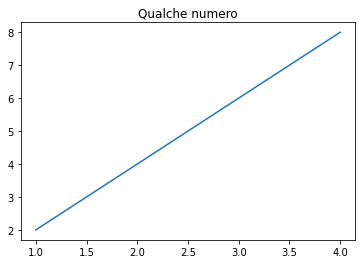

In [16]:

x = [1,2,3,4]
y = [2,4,6,8]
plt.plot(x, y) # possiamo direttamente passare liste per le x e y
plt.title('Qualche numero')
plt.show()


Possiamo anche creare serie con numpy. Proviamo a fare una parabola:

In [17]:
import numpy as np
x = np.arange(0.,5.,0.1)
#  '**' è l'operatore di elevamento a potenza in Python, NON '^'
y = x**2  

Utilizziamo la funzione `type` per capire che tipo di dati sono x e y:

In [18]:
type(x)

numpy.ndarray

In [19]:
type(y)

numpy.ndarray

Si tratta quindi di vettori di NumPy.

Let's plot it:

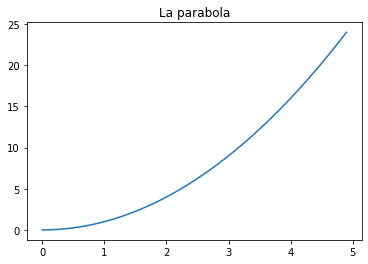

In [20]:
plt.title('La parabola')
plt.plot(x,y);

Se vogliamo che le unità dell'asse x siano della stessa dimensione di quelle dell'asse y, possiamo utilizzare la funzione [gca](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html?highlight=matplotlib%20pyplot%20gca#matplotlib.pyplot.gca)

Per settare i limiti delle x e delle y, possiamo usare `xlim` e `ylim`:

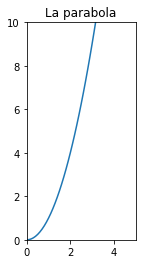

In [21]:
plt.xlim([0, 5])
plt.ylim([0,10])
plt.title('La parabola')

plt.gca().set_aspect('equal')
plt.plot(x,y);

### 3.2 Grafici matplotlib da strutture pandas

Si possono ricavare grafici direttamente da strutture pandas, sempre usando lo _stile matlab_. Facciamo un esempio semplice, per casi più complessi rimandiamo alla documentazione di [DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html). 

In caso di un numero molto elevato di dati, può essere utile avere un'idea qualitativa dei dati, mettendoli in grafico:

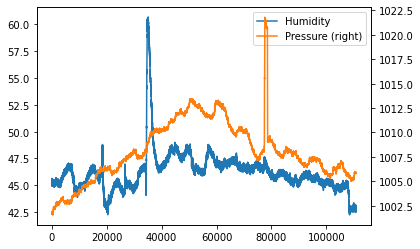

In [22]:
df.humidity.plot(label="Humidity", legend=True)
# con secondary_y=True facciamo apparire i numeri per l'asse delle y
# del secondo grafico sulla destra
df.pressure.plot(secondary_y=True, label="Pressure", legend=True);

Proviamo a mettere valori di pressione sull'asse orizzontale, e vedere quali valori di umidità sull'asse verticale corrispondono ad una certa pressione:

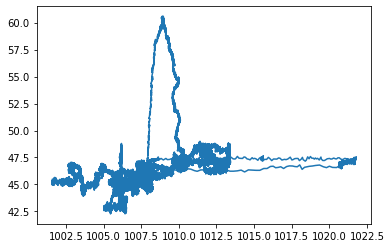

In [23]:
plt.plot(df['pressure'], df['humidity'])

## 4. Operazioni su righe

Se consideriamo le righe di un dataset, tipicamente le vorremo indicizzare, filtrare e ordinare.

### 4.1 Indicizzare con interi

Riportiamo qui l'indicizzazione più semplice tramite numeri di riga.

Per ottenere la i-esima serie si utilizza il metodo `iloc[i]` (qui riusiamo il dataset dell'AstroPI) :

In [24]:
df.iloc[6]

ROW_ID                          7
temp_cpu                    31.68
temp_h                      27.53
temp_p                      25.01
humidity                    45.31
pressure                   1001.7
pitch                        0.63
roll                        53.55
yaw                         186.1
mag_x                  -50.447346
mag_y                   -7.937309
mag_z                  -12.188574
accel_x                  -0.00051
accel_y                  0.019264
accel_z                  0.014528
gyro_x                  -0.000111
gyro_y                    0.00032
gyro_z                   0.000222
reset                           0
time_stamp    2016-02-16 10:45:41
Name: 6, dtype: object

&Egrave; possibile selezionare un dataframe di posizioni contigue, utilizzando lo _slicing_, come abbiamo già fatto per [stringhe](https://it.softpython.org/strings/strings2-sol.html#Slice) e [liste](https://it.softpython.org/lists/lists2-sol.html#Slice).

Qua per esempio selezioniamo le righe dalla 5 _inclusa_ alla 7 _esclusa_ :

In [25]:
df.iloc[5:7]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41


Filtrando le righe possiamo 'zommare' nel dataset, selezionando per esempio nel nuovo dataframe `df2` le righe tra la 12500esima (inclusa) e la 15000esima (esclusa): 

In [26]:
df2=df.iloc[12500:15000]

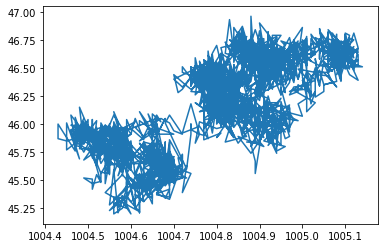

In [27]:
plt.plot(df2['pressure'], df2['humidity'])

<AxesSubplot:>

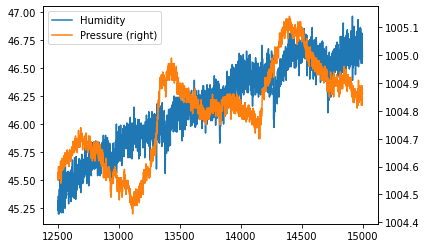

In [28]:
df2.humidity.plot(label="Humidity", legend=True)
df2.pressure.plot(secondary_y=True, label="Pressure", legend=True)

### 4.2 Filtrare

&Egrave; possibile filtrare i dati in base al soddisfacimento di una condizione, che si può esprimere indicando una colonna e un operatore di comparazione, per esempio: 

In [29]:
df.ROW_ID >= 6

0         False
1         False
2         False
3         False
4         False
          ...  
110864     True
110865     True
110866     True
110867     True
110868     True
Name: ROW_ID, Length: 110869, dtype: bool

Vediamo che si tratta di una serie di valori `True` o `False`, a seconda se il valore di `ROW_ID` è maggiore o uguale a `6`. Qual'è il tipo di questo risultato?

In [30]:
type(df.ROW_ID >= 6)

pandas.core.series.Series

#### Combinare filtri

In modo analogo al [filtraggio in Numpy](https://it.softpython.org/matrices-numpy/matrices-numpy1-sol.html#Filtraggio), è possibile esprimere più condizioni con l'operatore speciale di congiunzione `&` 

`(df.ROW_ID >= 6) & (df.ROW_ID <= 10)` sarà una serie di valori `True` o `False`, se ROW_ID è contemporaneamente maggiore o uguale a 6 e minore e uguale a 10.

In [31]:
type((df.ROW_ID >= 6) & (df.ROW_ID <= 10))

pandas.core.series.Series

Se vogliamo le righe complete del dataframe che soddisfano la condizione, possiamo scrivere così: 

<div class="alert alert-warning">

**IMPORTANTE**:  usiamo `df` all'_esterno_ dell'espressione `df[     ]` iniziando e chiudendo con le parentesi quadrate per dire a Python che vogliamo filtrare sul dataframe `df`, e usiamo di nuovo `df` all'_interno_ delle quadre per indicare su _quali colonne_ e _quali righe_ vogliamo filtrare 

</div>

In [32]:
df[  (df.ROW_ID >= 6) & (df.ROW_ID <= 10)  ]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
5,6,31.69,27.55,25.01,45.12,1001.67,0.85,53.53,185.52,-50.246476,-8.343209,-11.938124,-0.000536,0.019453,0.014380,0.000273,0.000494,-0.000059,0,2016-02-16 10:45:30
6,7,31.68,27.53,25.01,45.31,1001.70,0.63,53.55,186.10,-50.447346,-7.937309,-12.188574,-0.000510,0.019264,0.014528,-0.000111,0.000320,0.000222,0,2016-02-16 10:45:41
7,8,31.66,27.55,25.01,45.34,1001.70,1.49,53.65,186.08,-50.668232,-7.762600,-12.284196,-0.000523,0.019473,0.014298,-0.000044,0.000436,0.000301,0,2016-02-16 10:45:50
8,9,31.67,27.54,25.01,45.20,1001.72,1.22,53.77,186.55,-50.761529,-7.262934,-11.981090,-0.000522,0.019385,0.014286,0.000358,0.000651,0.000187,0,2016-02-16 10:46:01
9,10,31.67,27.54,25.01,45.41,1001.75,1.63,53.46,185.94,-51.243832,-6.875270,-11.672494,-0.000581,0.019390,0.014441,0.000266,0.000676,0.000356,0,2016-02-16 10:46:10


Quindi se cerchiamo il record in cui la pressione è massima, utilizziamo la proprietà ```values``` della serie su cui calcoliamo il valore massimo:

In [33]:
df[  (df.pressure == df.pressure.values.max())  ]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
77602,77603,32.44,28.31,25.74,47.57,1021.78,1.1,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.01817,0.014295,-0.000139,-0.000179,-0.000298,0,2016-02-25 12:13:20


### 4.3 Ordinare

Per avere un NUOVO dataframe ordinato in base a una o più colonne possiamo usare il metodo `sort_values`:

In [34]:
df.sort_values('pressure',ascending=False).head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
77602,77603,32.44,28.31,25.74,47.57,1021.78,1.10,51.82,267.39,-0.797428,10.891803,-15.728202,-0.000612,0.018170,0.014295,-0.000139,-0.000179,-0.000298,0,2016-02-25 12:13:20
77601,77602,32.45,28.30,25.74,47.26,1021.75,1.53,51.76,266.12,-1.266335,10.927442,-15.690558,-0.000661,0.018357,0.014533,0.000152,0.000459,-0.000298,0,2016-02-25 12:13:10
77603,77604,32.44,28.30,25.74,47.29,1021.75,1.86,51.83,268.83,-0.320795,10.651441,-15.565123,-0.000648,0.018290,0.014372,0.000049,0.000473,-0.000029,0,2016-02-25 12:13:30
77604,77605,32.43,28.30,25.74,47.39,1021.75,1.78,51.54,269.41,-0.130574,10.628383,-15.488983,-0.000672,0.018154,0.014602,0.000360,0.000089,-0.000002,0,2016-02-25 12:13:40
77608,77609,32.42,28.29,25.74,47.36,1021.73,0.86,51.89,272.77,0.952025,10.435951,-16.027235,-0.000607,0.018186,0.014232,-0.000260,-0.000059,-0.000187,0,2016-02-25 12:14:20


### 4.4 Esercizio - statistiche meteo

✪ Analizza i dati del Dataframe ```meteo``` per trovare:

* i valori di pressione media, minima e massima
* la temperatura media
* le date delle giornate di pioggia


In [35]:
# scrivi qui
print("Media pressione : %s" % meteo.Pressione.values.mean())
print("Minimo pressione : %s" % meteo.Pressione.values.min())
print("Massimo pressione : %s" % meteo.Pressione.values.max())
print("Media temperatura : %s" % meteo.Temp.values.mean())
meteo[(meteo.Pioggia > 0)]

Media pressione : 986.3408269631689
Minimo pressione : 966.3
Massimo pressione : 998.3
Media temperatura : 6.410701876302988


,Data,Pressione,Pioggia,Temp
433,05/11/2017 12:15,979.2,0.2,8.6
435,05/11/2017 12:45,978.9,0.2,8.4
436,05/11/2017 13:00,979.0,0.2,8.4
437,05/11/2017 13:15,979.1,0.8,8.2
438,05/11/2017 13:30,979.0,0.6,8.2
...,...,...,...,...
2754,29/11/2017 17:15,976.1,0.2,0.9
2755,29/11/2017 17:30,975.9,0.2,0.9
2802,30/11/2017 05:15,971.3,0.2,1.3
2803,30/11/2017 05:30,971.3,0.2,1.1


In [35]:
# scrivi qui



Media pressione : 986.3408269631689
Minimo pressione : 966.3
Massimo pressione : 998.3
Media temperatura : 6.410701876302988


,Data,Pressione,Pioggia,Temp
433,05/11/2017 12:15,979.2,0.2,8.6
435,05/11/2017 12:45,978.9,0.2,8.4
436,05/11/2017 13:00,979.0,0.2,8.4
437,05/11/2017 13:15,979.1,0.8,8.2
438,05/11/2017 13:30,979.0,0.6,8.2
...,...,...,...,...
2754,29/11/2017 17:15,976.1,0.2,0.9
2755,29/11/2017 17:30,975.9,0.2,0.9
2802,30/11/2017 05:15,971.3,0.2,1.3
2803,30/11/2017 05:30,971.3,0.2,1.1


## 5. Valori object e stringhe

In generale, quando vogliamo manipolare oggetti di un tipo conosciuto, diciamo stringhe che hanno il tipo `str`, possiamo scrivere `.str` dopo una serie e poi trattare il risultato come se fosse una stringa singola, usando un qualsiasi operatore (es: slice) o un metodo consentito da quella particolare classe, o altri forniti da pandas.

Per il testo in particolare ci sono vari modi di manipolarlo, qua ne indichiamo un paio, per maggiori dettagli vedere [la documentazione di pandas](https://pandas.pydata.org/pandas-docs/stable/text.html))

### 5.1 Filtrare per valori testuali

Quando vogliamo filtrare per valori testuali, possiamo usare `.str.contains`, qua per esempio selezioniamo tutte le rilevazioni degli ultimi giorni di febbraio (che hanno quindi il timestamp che contiene `2016-02-2`) : 

In [36]:
df[  df['time_stamp'].str.contains('2016-02-2')  ]

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
30442,30443,32.30,28.12,25.59,45.05,1008.01,1.47,51.82,51.18,9.215883,-12.947023,4.066202,-0.000612,0.018792,0.014558,-0.000042,0.000275,0.000157,0,2016-02-20 00:00:00
30443,30444,32.25,28.13,25.59,44.82,1008.02,0.81,51.53,52.21,8.710130,-13.143595,3.499386,-0.000718,0.019290,0.014667,0.000260,0.001011,0.000149,0,2016-02-20 00:00:10
30444,30445,33.07,28.13,25.59,45.08,1008.09,0.68,51.69,57.36,7.383435,-13.827667,4.438656,-0.000700,0.018714,0.014598,0.000299,0.000343,-0.000025,0,2016-02-20 00:00:41
30445,30446,32.63,28.10,25.60,44.87,1008.07,1.42,52.13,59.95,7.292313,-13.999682,4.517029,-0.000657,0.018857,0.014565,0.000160,0.000349,-0.000190,0,2016-02-20 00:00:50
30446,30447,32.55,28.11,25.60,44.94,1008.07,1.41,51.86,61.83,6.699141,-14.065591,4.448778,-0.000678,0.018871,0.014564,-0.000608,-0.000381,-0.000243,0,2016-02-20 00:01:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,-27.642610,1.563183,-0.000682,0.017743,0.014646,-0.000264,0.000206,0.000196,0,2016-02-29 09:24:21
110865,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,-27.729389,1.785682,-0.000736,0.017570,0.014855,0.000143,0.000199,-0.000024,0,2016-02-29 09:24:30
110866,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,-27.719479,1.629533,-0.000647,0.017657,0.014799,0.000537,0.000257,0.000057,0,2016-02-29 09:24:41
110867,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,-27.793136,1.703806,-0.000835,0.017635,0.014877,0.000534,0.000456,0.000195,0,2016-02-29 09:24:50


### 5.2 Estrarre stringhe

Per estrarre solo il giorno dalla colonna `time_stamp`, possiamo usare `str` con l'operatore slice e parentesi quadre:

In [37]:
df['time_stamp'].str[8:10]  

0         16
1         16
2         16
3         16
4         16
          ..
110864    29
110865    29
110866    29
110867    29
110868    29
Name: time_stamp, Length: 110869, dtype: object

## 6. Operazioni su colonne

Vediamo ora come selezionare, aggiungere e trasformare colonne.

### 6.1 - Selezionare colonne

Se vogliamo un sotto-insieme di colonne, possiamo indicare i nomi in una lista così:

**NOTA**: dentro le quadre esterne c'è una semplice lista di stringhe senza `df`!

In [38]:
df[  ['temp_h', 'temp_p', 'time_stamp']  ]

,temp_h,temp_p,time_stamp
0,27.57,25.01,2016-02-16 10:44:40
1,27.53,25.01,2016-02-16 10:44:50
2,27.53,25.01,2016-02-16 10:45:00
3,27.52,25.01,2016-02-16 10:45:10
4,27.54,25.01,2016-02-16 10:45:20
...,...,...,...
110864,27.52,24.83,2016-02-29 09:24:21
110865,27.50,24.83,2016-02-29 09:24:30
110866,27.50,24.83,2016-02-29 09:24:41
110867,27.50,24.83,2016-02-29 09:24:50


Come sempre la selezione di colonne non cambia il dataframe originale:

In [39]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,mag_y,mag_z,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,-8.132907,-12.129346,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,-8.304243,-12.943096,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,-8.470832,-12.642772,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,-8.457380,-12.615509,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,-8.122609,-12.678341,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20


### 6.2 - Aggiungere Colonne

E' possibile ottenere nuove colonne effettuando calcoli da campi di altri colonne in modo molto naturale. Per esempio, qua ricaviamo la nuova colonna `mag_tot`, cioè il campo magnetico assoluto rilevato dalla stazione spaziale ricavandolo a partire da `mag_x`, `mag_y`, e `mag_z`, e poi la plottiamo:

<AxesSubplot:>

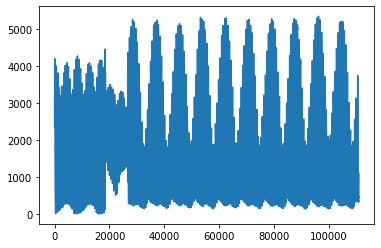

In [40]:
df['mag_tot'] = df['mag_x']**2 + df['mag_y']**2 + df['mag_z']**2
df.mag_tot.plot()

Troviamo quando il campo magnetico era al massimo: 

In [41]:
df['time_stamp'][(df.mag_tot == df.mag_tot.values.max())]

96156    2016-02-27 16:12:31
Name: time_stamp, dtype: object

Inserendo il valore trovato sul sito [isstracker.com/historical](http://www.isstracker.com/historical), possiamo rilevare le posizioni in cui il campo magnetico è più forte.

#### Scrivere solo in alcune righe

La properietà `loc` ci permette di filtrare righe secondo una proprietà e selezionare una colonna, che può essere anche nuova. In questo caso, per le righe dove la temperatura cpu è eccessiva, scriviamo il valore `True` nei campi della colonna con intestazione `'Too hot'`:

In [42]:
df.loc[(df.temp_cpu > 31.68),'Too hot'] = True 

Vediamo la tabella risultante (scorri fino in fondo per vedere la nuova colonna). Notiamo come i valori delle righe che non abbiamo filtrato vengono rappresentati con  `NaN`, che letteralmente significa [not a number](https://it.softpython.org/matrices-numpy/matrices-numpy1-sol.html#NaN-e-infinit%C3%A0): 

In [43]:
df.head()

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,reset,time_stamp,mag_tot,Too hot
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,-0.000468,0.019439,0.014569,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40,2368.337207,True
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,-0.000614,0.019436,0.014577,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50,2615.870247,True
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,-0.000569,0.019359,0.014357,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00,2648.484927,NaN
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,-0.000575,0.019383,0.014409,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10,2665.305485,True
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,-0.000548,0.019378,0.014380,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20,2732.388620,NaN


Pandas è una libreria molto flessibile, e fornisce diversi modi per ottenere gli stessi obbiettivi. Per esempio, possiamo effettuare la stessa operazione di sopra con il comando `np.where` come qua sotto. Ad esempio, aggiungiamo una colonna che mi dice se la pressione è sopra o sotto la media.

In [44]:
pressione_media = df.pressure.values.mean()
df['check_p'] = np.where(df.pressure <= pressione_media, 'sotto', 'sopra')

### 6.2.1 Esercizio - temperatura meteo in Fahrenheit 

Nel dataframe `meteo`, crea una colonna `Temp (Fahrenheit)` con la temperatura misurata in gradi Fahrenheit

Formula per calcolare la conversione dai gradi Celsius (C):

$Fahrenheit = \frac{9}{5}C + 32$

In [45]:
# scrivi qui



In [46]:
# SOLUZIONE
print()
print("       **************  OUTPUT SOLUZIONE  **************")
meteo['Temp (Fahrenheit)'] = meteo['Temp']* 9/5 + 32 
meteo.head()


       **************  OUTPUT SOLUZIONE  **************


,Data,Pressione,Pioggia,Temp,Temp (Fahrenheit)
0,01/11/2017 00:00,995.4,0.0,5.4,41.72
1,01/11/2017 00:15,995.5,0.0,6.0,42.80
2,01/11/2017 00:30,995.5,0.0,5.9,42.62
3,01/11/2017 00:45,995.7,0.0,5.4,41.72
4,01/11/2017 01:00,995.7,0.0,5.3,41.54



       **************  OUTPUT SOLUZIONE  **************


,Data,Pressione,Pioggia,Temp,Temp (Fahrenheit)
0,01/11/2017 00:00,995.4,0.0,5.4,41.72
1,01/11/2017 00:15,995.5,0.0,6.0,42.80
2,01/11/2017 00:30,995.5,0.0,5.9,42.62
3,01/11/2017 00:45,995.7,0.0,5.4,41.72
4,01/11/2017 01:00,995.7,0.0,5.3,41.54


### 6.2.2 Esercizio - Pressione vs Temperatura

La pressione dovrebbe essere direttamente proporzionale alla temperatura in un ambiente chiuso secondo la [Legge di Gay-Lussac](https://en.wikipedia.org/wiki/Gay-Lussac%27s_law):

$\frac{P}{T} = k$

E' vero per il dataset del `meteo`? Prova a scoprirlo calcolando direttamente la formula e comparando con i risultati del metodo `corr()`.

In [47]:
# SOLUZIONE


# come atteso, in un ambiente aperto non c'è molta correlazione lineare
#meteo.corr()
#meteo['Pressione'] / meteo['Temp']

### 6.3 Trasformare colonne

Supponiamo di voler convertire tutti i valori della colonna temperatura da float a interi.

Sappiamo che per convertire un float in un intero c'è la funzione predefinita di Python `int`:

In [48]:
int(23.7)

23

Vorremmo applicare questa funzione a tutti gli elementi della colonna `humidity`. 

Per farlo, possiamo chiamare il metodo `transform` e passargli la funzione `int` _come parametro_

**NOTA**: non ci sono parentesi tonde dopo `int` !!!

In [49]:
df['humidity'].transform(int)

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

Per chiarire cosa voglia dire _passare una funzione_, vediamo altri due modi _completamente equivalenti_ che avremmo potuto usare per passare la funzione.

**Definire una funzione**: Avremmo potuto definire una funzione `mia_f` come questa (nota che la funzione DEVE RITORNARE qualcosa!)

In [50]:
def mia_f(x):
    return int(x)

df['humidity'].transform(mia_f)

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

**funzione lambda**: Avremmo potuto usare una funzione `lambda`, cioè una funzione senza un nome che è definita su una sola linea:

In [51]:
df['humidity'].transform( lambda x: int(x) )

0         44
1         45
2         45
3         45
4         45
          ..
110864    42
110865    42
110866    42
110867    42
110868    42
Name: humidity, Length: 110869, dtype: int64

Indipendentemente dal modo in cui scegliamo di passare la funzione, il metodo `tranform` non cambia il dataframe originale:

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      110869 non-null  int64  
 1   temp_cpu    110869 non-null  float64
 2   temp_h      110869 non-null  float64
 3   temp_p      110869 non-null  float64
 4   humidity    110869 non-null  float64
 5   pressure    110869 non-null  float64
 6   pitch       110869 non-null  float64
 7   roll        110869 non-null  float64
 8   yaw         110869 non-null  float64
 9   mag_x       110869 non-null  float64
 10  mag_y       110869 non-null  float64
 11  mag_z       110869 non-null  float64
 12  accel_x     110869 non-null  float64
 13  accel_y     110869 non-null  float64
 14  accel_z     110869 non-null  float64
 15  gyro_x      110869 non-null  float64
 16  gyro_y      110869 non-null  float64
 17  gyro_z      110869 non-null  float64
 18  reset       110869 non-null  int64  
 19  ti

Se vogliamo aggiungere una nuova colonna, diciamo `humidity_int`, dobbiamo esplicitamente assegnare il risultato di `transform` alla nuova serie:

In [53]:
df['humidity_int'] = df['humidity'].transform( lambda x: int(x) )

Nota come pandas automaticamente inferisce il tipo `int64` per la colonna appena creata:

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ROW_ID        110869 non-null  int64  
 1   temp_cpu      110869 non-null  float64
 2   temp_h        110869 non-null  float64
 3   temp_p        110869 non-null  float64
 4   humidity      110869 non-null  float64
 5   pressure      110869 non-null  float64
 6   pitch         110869 non-null  float64
 7   roll          110869 non-null  float64
 8   yaw           110869 non-null  float64
 9   mag_x         110869 non-null  float64
 10  mag_y         110869 non-null  float64
 11  mag_z         110869 non-null  float64
 12  accel_x       110869 non-null  float64
 13  accel_y       110869 non-null  float64
 14  accel_z       110869 non-null  float64
 15  gyro_x        110869 non-null  float64
 16  gyro_y        110869 non-null  float64
 17  gyro_z        110869 non-null  float64
 18  rese

## 7. Raggruppare

**Riferimenti**: 

* [PythonDataScienceHandbook: Aggregation and Grouping](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

Per raggruppare oggetti ed effettuare statistiche su ogni gruppo si può usare il metodo `groupby`. Supponiamo di voler calcolare quante letture di `humidity` sono state fatte per ciascun valore intero di umidità `humidity_int` (qua usiamo il metodo pandas `groupby`, ma per gli istogrammi potresti anche usare [numpy](https://stackoverflow.com/a/13130357))

Dopo il metodo `groupby`  indichiamo prima la colonna su cui raggruppare (``humidity_int``), poi la colonna su cui effettuare la statistica (`'humidity'`) e infine la statistica da calcolare, in questo caso `.count()` (altre comuni sono `sum()`, `min()`, `max()` e media `mean()`):

In [55]:
df.groupby(['humidity_int'])['humidity'].count()

humidity_int
42     2776
43     2479
44    13029
45    32730
46    35775
47    14176
48     7392
49      297
50      155
51      205
52      209
53      128
54      224
55      164
56      139
57      183
58      237
59      271
60      300
Name: humidity, dtype: int64

Nota che abbiamo ottenuto solo 19 righe. Per avere una serie che riempia tutta la tabella, assegnando a ciascuna riga il conteggio del proprio gruppo, possiamo usare `transform` così:

In [56]:
df.groupby(['humidity_int'])['humidity'].transform('count')

0         13029
1         32730
2         32730
3         32730
4         32730
          ...  
110864     2776
110865     2776
110866     2776
110867     2776
110868     2776
Name: humidity, Length: 110869, dtype: int64

Come al solito, `group_by` non modifica il dataframe, se vogliamo che il risultato sia salvato nel dataframe dobbiamo assegnare il risultato ad una nuova colonna:

In [57]:
df['Conteggio umidità'] = df.groupby(['humidity_int'])['humidity'].transform('count')

In [58]:
df

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,gyro_x,gyro_y,gyro_z,reset,time_stamp,mag_tot,Too hot,check_p,humidity_int,Conteggio umidità
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,0.000942,0.000492,-0.000750,20,2016-02-16 10:44:40,2368.337207,True,sotto,44,13029
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,0.000218,-0.000005,-0.000235,0,2016-02-16 10:44:50,2615.870247,True,sotto,45,32730
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,0.000395,0.000600,-0.000003,0,2016-02-16 10:45:00,2648.484927,NaN,sotto,45,32730
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,0.000308,0.000577,-0.000102,0,2016-02-16 10:45:10,2665.305485,True,sotto,45,32730
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,0.000321,0.000691,0.000272,0,2016-02-16 10:45:20,2732.388620,NaN,sotto,45,32730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110864,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,...,-0.000264,0.000206,0.000196,0,2016-02-29 09:24:21,996.676408,NaN,sotto,42,2776
110865,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,...,0.000143,0.000199,-0.000024,0,2016-02-29 09:24:30,1022.779594,NaN,sotto,42,2776
110866,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,...,0.000537,0.000257,0.000057,0,2016-02-29 09:24:41,1048.121268,NaN,sotto,42,2776
110867,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,...,0.000534,0.000456,0.000195,0,2016-02-29 09:24:50,1073.629703,NaN,sotto,42,2776


## 8. Esercizi col meteo

### 8.1 Plot meteo

✪ Mettere in grafico l'andamento delle temperature del dataframe _meteo_:


In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# scrivi qui



<AxesSubplot:>

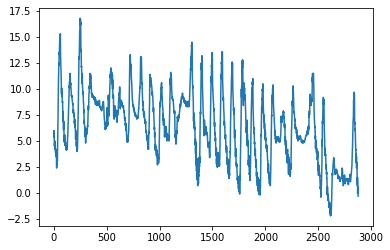

In [60]:
# SOLUZIONE

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

meteo.Temp.plot()

<AxesSubplot:>

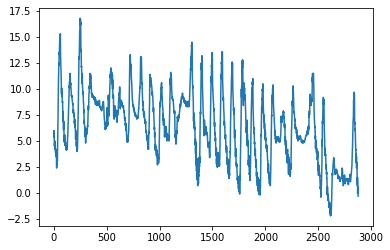

### 8.2 Pressione meteo e pioggia


✪ Nello stesso plot di sopra mostra la pressione e l'ammontare di pioggia.

In [61]:
# scrivi qui




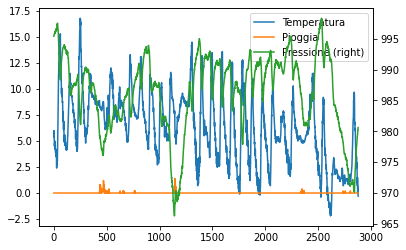

In [62]:
# SOLUZIONE

meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Pioggia.plot(label="Pioggia", legend=True)
meteo.Pressione.plot(secondary_y=True, label="Pressione", legend=True);

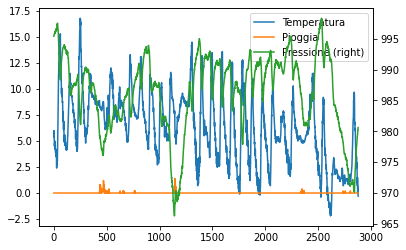


### 8.3 Temperatura media del meteo

✪✪✪ Calcola la temperatura media giornaliera per ciascun giorno, e mostrala nel plot, così da avere una coppia di nuove colonne come queste:

```
    Giorno      Temp_media_giorno
01/11/2017      7.983333
01/11/2017      7.983333
01/11/2017      7.983333
    .               .
    .               .
02/11/2017      7.384375
02/11/2017      7.384375
02/11/2017      7.384375
    .               .
    .               .
```


**SUGGERIMENTO 1**: aggiungi la colonna `'Giorno'` estraendo solo il giorno dalla data. Per farlo usa la funzione `.str` applicata a tutta la colonna.

**SUGGERIMENTO 2**: Ci sono vari modi per risolvere il problema: 

- il più efficiente ed elegante è con l'operatore `groupby`, vedere [Pandas trasform - more than meets the eye](https://towardsdatascience.com/pandas-transform-more-than-meets-the-eye-928542b40b56)
- Come alternative, potresti usare un `for` per ciclare i giorni. Tipicamente usare un `for` non è una buona idea con Pandas, perchè con dataset larghi ci può voler molto ad eseguire gli aggiornamenti. Comunque, dato che questo dataset è piccolo a sufficienza, puoi provare ad usare un `for` per ciclare sui giorni e dovresti ottenere i risultati in un tempo ragionevole


In [63]:
# scrivi qui




    *******    SOLUZIONE 1 OUTPUT - ricalcola media per ogni riga - lento !

CON TEMPERATURA MEDIA
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


<AxesSubplot:>

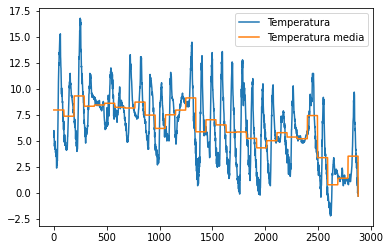

In [64]:
# SOLUZIONE

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Giorno'] = meteo['Data'].str[0:10]


#print("CON GIORNO")
#print(meteo.head())
for giorno in meteo['Giorno']:
    temp_media_giorno = meteo[(meteo.Giorno == giorno)].Temp.values.mean()
    meteo.loc[(meteo.Giorno == giorno),'Temp_media_giorno']= temp_media_giorno

print()
print('    *******    SOLUZIONE 1 OUTPUT - ricalcola media per ogni riga - lento !')
print()
    
print("CON TEMPERATURA MEDIA")
print(meteo.head())
meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Temp_media_giorno.plot(label="Temperatura media", legend=True)


    *******    SOLUZIONE 1 OUTPUT - ricalcola media per ogni riga - lento !

CON TEMPERATURA MEDIA
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


<AxesSubplot:>

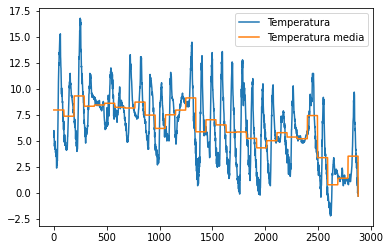



********  OUTPUT SOLUZIONE 2
  ricalcola media solo 30 volte usando un dizionario diz_avg,
  più veloce ma ancora non ottimale
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


<AxesSubplot:>

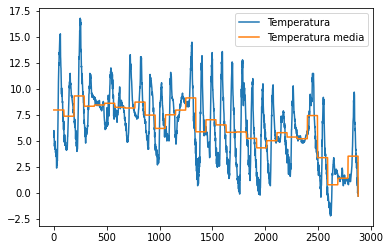

In [65]:
# SOLUZIONE

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Giorno'] = meteo['Data'].str[0:10]
#print()
#print("CON GIORNO")
#print(meteo.head())
diz_medie = {}
for giorno in meteo['Giorno']:
    if giorno not in diz_medie:
        diz_medie[giorno] =  meteo[ meteo['Giorno'] == giorno ]['Temp'].mean()

for giorno in meteo['Giorno']:
    meteo.loc[(meteo.Giorno == giorno),'Temp_media_giorno']= diz_medie[giorno]
    
print()
print()
print('********  OUTPUT SOLUZIONE 2')
print('  ricalcola media solo 30 volte usando un dizionario diz_avg,')
print('  più veloce ma ancora non ottimale')
print(meteo.head())
meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Temp_media_giorno.plot(label="Temperatura media", legend=True)    



********  OUTPUT SOLUZIONE 2
  ricalcola media solo 30 volte usando un dizionario diz_avg,
  più veloce ma ancora non ottimale
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


<AxesSubplot:>

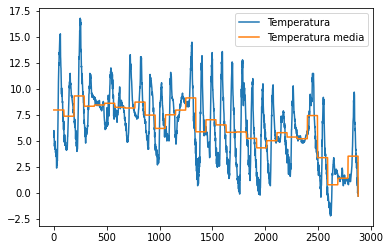


********  OUTPUT SOLUZIONE 3  -  soluzione migliore con groupby e transform 

CON TEMPERATURA MEDIA
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


<AxesSubplot:>

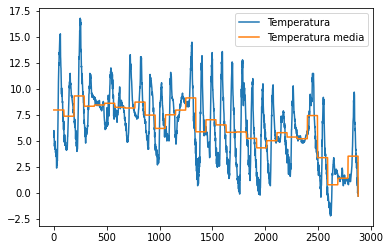

In [66]:
# SOLUZIONE

print()
print('********  OUTPUT SOLUZIONE 3  -  soluzione migliore con groupby e transform ')

meteo = pd.read_csv('meteo.csv', encoding='UTF-8')
meteo['Giorno'] = meteo['Data'].str[0:10]
# .transform è necessaria per evitare di avere una tabella con solo 30 linee
meteo['Temp_media_giorno'] = meteo.groupby('Giorno')['Temp'].transform('mean')

meteo
print()
print("CON TEMPERATURA MEDIA")
print(meteo.head())
meteo.Temp.plot(label="Temperatura", legend=True)
meteo.Temp_media_giorno.plot(label="Temperatura media", legend=True)


********  OUTPUT SOLUZIONE 3  -  soluzione migliore con groupby e transform 

CON TEMPERATURA MEDIA
               Data  Pressione  Pioggia  Temp      Giorno  Temp_media_giorno
0  01/11/2017 00:00      995.4      0.0   5.4  01/11/2017           7.983333
1  01/11/2017 00:15      995.5      0.0   6.0  01/11/2017           7.983333
2  01/11/2017 00:30      995.5      0.0   5.9  01/11/2017           7.983333
3  01/11/2017 00:45      995.7      0.0   5.4  01/11/2017           7.983333
4  01/11/2017 01:00      995.7      0.0   5.3  01/11/2017           7.983333


<AxesSubplot:>

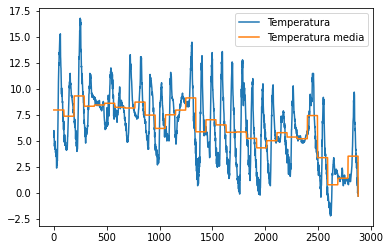

## 9 Esercizio - Inquinanti aria

Proviamo ad analizzare i dati orari delle stazioni di monitoraggio della qualità dell'aria della Provincia Autonoma di Trento validati dall'Agenzia per l'ambiente.

Fonte: [dati.trentino.it](https://dati.trentino.it/dataset/qualita-dell-aria-rilevazioni-delle-stazioni-monitoraggio)

### 9.1 - caricare il file

✪ Carica in pandas il file [aria.csv](aria.csv)

**IMPORTANTE**: metti il dataframe nella variabile `aria`, così da non confonderlo coi dataframe precedenti


**IMPORTANTE**: metti come encoding `'latin-1'` (altrimenti a seconda del tuo sistema operativo potrebbe non caricarlo dando strani messaggi d'errore)

**IMPORTANTE**: se ricevi altri strani messaggi d'errore, aggiungi anche il parametro `engine=python`


In [67]:

# scrivi qui

import pandas as pd   
import numpy as np    

# ricordati l'encoding !
aria = pd.read_csv('aria.csv', encoding='latin-1')
aria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20693 entries, 0 to 20692
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Stazione         20693 non-null  object 
 1   Inquinante       20693 non-null  object 
 2   Data             20693 non-null  object 
 3   Ora              20693 non-null  int64  
 4   Valore           20693 non-null  float64
 5   Unità di misura  20693 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 970.1+ KB


In [67]:

# scrivi qui



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20693 entries, 0 to 20692
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Stazione         20693 non-null  object 
 1   Inquinante       20693 non-null  object 
 2   Data             20693 non-null  object 
 3   Ora              20693 non-null  int64  
 4   Valore           20693 non-null  float64
 5   Unità di misura  20693 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 970.1+ KB


### 9.2 - media inquinanti

✪ Trova la media dei valori di inquinanti `PM10` al `Parco S. Chiara` (media su tutte le giornate). Dovresti ottenere il valore `11.385752688172044`

In [68]:
# scrivi qui

aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10')].Valore.values.mean()

11.385752688172044

In [68]:
# scrivi qui



11.385752688172044


### 9.3 - Grafico PM10

✪ Usando `plt.plot` come visto in un [esempio precedente](#Grafici-matplotlib-da-strutture-pandas) (quindi passandogli direttamente le serie rilevanti di Pandas), mostra in un grafico l'andamento dei valori di inquinanti `PM10` nella giornata del 7 Maggio 2019

In [71]:
# scrivi qui




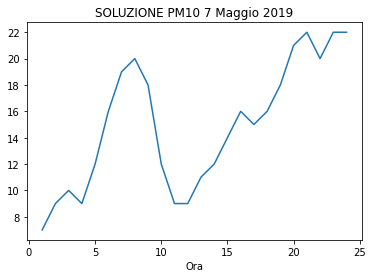

In [72]:
# SOLUZIONE

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

filtrato = aria[(aria.Stazione == 'Parco S. Chiara') & (aria.Inquinante == 'PM10') & (aria.Data == '2019-05-07')]

plt.plot(filtrato['Ora'], filtrato['Valore'] )
plt.title('SOLUZIONE PM10 7 Maggio 2019')
plt.xlabel('Ora')
plt.show()

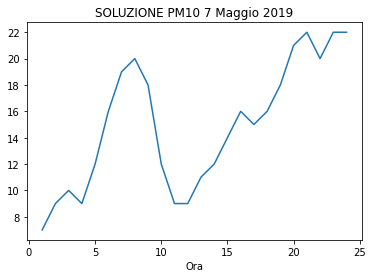

## 10. Unire tabelle

Supponi di voler aggiungere una colonna con la posizione geografica della ISS. Per farlo, avresti bisogno di unire il nostro dataset con un altro che contenga questa informazione. Prendiamo per esempio il dataset [iss-coords.csv](iss-coords.csv)

In [73]:
iss_coords = pd.read_csv('iss-coords.csv', encoding='UTF-8')

In [74]:
iss_coords

,timestamp,lat,lon
0,2016-01-01 05:11:30,-45.103458,14.083858
1,2016-01-01 06:49:59,-37.597242,28.931170
2,2016-01-01 11:52:30,17.126141,77.535602
3,2016-01-01 11:52:30,17.126464,77.535861
4,2016-01-01 14:54:08,7.259561,70.001561
...,...,...,...
333,2016-02-29 13:23:17,-51.077590,-31.093987
334,2016-02-29 13:44:13,30.688553,-135.403820
335,2016-02-29 13:44:13,30.688295,-135.403533
336,2016-02-29 18:44:57,27.608774,-130.198781


Notiamo che c'è una colonna `timestamp`, che sfortunatamente ha un nome leggermente diverse dalla colonna `time_stamp` (nota l'underscore `_`) nel dataset original astropi:

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110869 entries, 0 to 110868
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ROW_ID             110869 non-null  int64  
 1   temp_cpu           110869 non-null  float64
 2   temp_h             110869 non-null  float64
 3   temp_p             110869 non-null  float64
 4   humidity           110869 non-null  float64
 5   pressure           110869 non-null  float64
 6   pitch              110869 non-null  float64
 7   roll               110869 non-null  float64
 8   yaw                110869 non-null  float64
 9   mag_x              110869 non-null  float64
 10  mag_y              110869 non-null  float64
 11  mag_z              110869 non-null  float64
 12  accel_x            110869 non-null  float64
 13  accel_y            110869 non-null  float64
 14  accel_z            110869 non-null  float64
 15  gyro_x             110869 non-null  float64
 16  gy

Per fondere i dataset in base a due colonne, possiamo usare il comando `merge` così: 

In [76]:
# ricorda che merge produce un NUOVO dataframe:

geo_astropi = df.merge(iss_coords, left_on='time_stamp', right_on='timestamp')

# merge aggiungere sia la colonna time_stamp che timestamp,
# perciò rimuoviamo la colonna duplicata 'timestamp'

geo_astropi = geo_astropi.drop('timestamp', axis=1)

In [77]:
geo_astropi

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,gyro_z,reset,time_stamp,mag_tot,Too hot,check_p,humidity_int,Conteggio umidità,lat,lon
0,23231,32.53,28.37,25.89,45.31,1006.04,1.31,51.63,34.91,21.125001,...,0.000046,0,2016-02-19 03:49:00,2345.207992,True,sotto,45,32730,31.434741,52.917464
1,27052,32.30,28.12,25.62,45.57,1007.42,1.49,52.29,333.49,16.083471,...,0.000034,0,2016-02-19 14:30:40,323.634786,True,sotto,45,32730,-46.620658,-57.311657
2,27052,32.30,28.12,25.62,45.57,1007.42,1.49,52.29,333.49,16.083471,...,0.000034,0,2016-02-19 14:30:40,323.634786,True,sotto,45,32730,-46.620477,-57.311138
3,46933,32.21,28.05,25.50,47.36,1012.41,0.67,52.40,27.57,15.441683,...,0.000221,0,2016-02-21 22:14:11,342.159257,True,sopra,47,14176,19.138359,-140.211489
4,64572,32.32,28.18,25.61,47.45,1010.62,1.14,51.41,33.68,11.994554,...,0.000030,0,2016-02-23 23:40:50,264.655601,True,sopra,47,14176,4.713819,80.261665
5,68293,32.39,28.26,25.70,46.83,1010.51,0.61,51.91,287.86,6.554283,...,0.000171,0,2016-02-24 10:05:51,436.876111,True,sopra,46,35775,-46.061583,22.246025
6,73374,32.38,28.18,25.62,46.52,1008.28,0.90,51.77,30.80,9.947132,...,-0.000375,0,2016-02-25 00:23:01,226.089258,True,sopra,46,35775,47.047346,137.958918
7,90986,32.42,28.34,25.76,45.72,1006.79,0.57,49.85,10.57,7.805606,...,-0.000047,0,2016-02-27 01:43:10,149.700293,True,sotto,45,32730,-41.049112,30.193004
8,90986,32.42,28.34,25.76,45.72,1006.79,0.57,49.85,10.57,7.805606,...,-0.000047,0,2016-02-27 01:43:10,149.700293,True,sotto,45,32730,-8.402991,-100.981726
9,102440,32.62,28.62,26.02,45.15,1006.06,1.12,50.44,301.74,10.348327,...,-0.000061,0,2016-02-28 09:48:40,381.014223,True,sotto,45,32730,50.047523,175.566751


### 10.1 Esercizio - migliorare merge

Se noti, la tabella sopra ha le colonne `lat` e `lon`, ma pochissime righe. Perchè? Prova a fondere le tabelle in qualche modo utile in modo da avere tutte le righe originali e tutte le celle di `lat` e `lon` riempite.

- Per altre strategie di merge, leggi l'attributo `how` [Why And How To Use Merge With Pandas in Python](https://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738)
- Per riempire valori mancanti non usare tecniche di interpolazione, semplicemente metti la posizione della stazione in quel dato giorno o ora.

In [78]:
# scrivi qui

geo_astropi = df.merge(iss_coords, left_on='time_stamp', right_on='timestamp', how='left')

pd.merge_ordered(df, iss_coords, fill_method='ffill', how='left', left_on='time_stamp', right_on='timestamp')
geo_astropi

,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,reset,time_stamp,mag_tot,Too hot,check_p,humidity_int,Conteggio umidità,timestamp,lat,lon
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,20,2016-02-16 10:44:40,2368.337207,True,sotto,44,13029,NaN,NaN,NaN
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,0,2016-02-16 10:44:50,2615.870247,True,sotto,45,32730,NaN,NaN,NaN
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,0,2016-02-16 10:45:00,2648.484927,NaN,sotto,45,32730,NaN,NaN,NaN
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,0,2016-02-16 10:45:10,2665.305485,True,sotto,45,32730,NaN,NaN,NaN
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,0,2016-02-16 10:45:20,2732.388620,NaN,sotto,45,32730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110866,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,...,0,2016-02-29 09:24:21,996.676408,NaN,sotto,42,2776,NaN,NaN,NaN
110867,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,...,0,2016-02-29 09:24:30,1022.779594,NaN,sotto,42,2776,NaN,NaN,NaN
110868,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,...,0,2016-02-29 09:24:41,1048.121268,NaN,sotto,42,2776,NaN,NaN,NaN
110869,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,...,0,2016-02-29 09:24:50,1073.629703,NaN,sotto,42,2776,NaN,NaN,NaN


In [78]:
# scrivi qui



,ROW_ID,temp_cpu,temp_h,temp_p,humidity,pressure,pitch,roll,yaw,mag_x,...,reset,time_stamp,mag_tot,Too hot,check_p,humidity_int,Conteggio umidità,timestamp,lat,lon
0,1,31.88,27.57,25.01,44.94,1001.68,1.49,52.25,185.21,-46.422753,...,20,2016-02-16 10:44:40,2368.337207,True,sotto,44,13029,NaN,NaN,NaN
1,2,31.79,27.53,25.01,45.12,1001.72,1.03,53.73,186.72,-48.778951,...,0,2016-02-16 10:44:50,2615.870247,True,sotto,45,32730,NaN,NaN,NaN
2,3,31.66,27.53,25.01,45.12,1001.72,1.24,53.57,186.21,-49.161878,...,0,2016-02-16 10:45:00,2648.484927,NaN,sotto,45,32730,NaN,NaN,NaN
3,4,31.69,27.52,25.01,45.32,1001.69,1.57,53.63,186.03,-49.341941,...,0,2016-02-16 10:45:10,2665.305485,True,sotto,45,32730,NaN,NaN,NaN
4,5,31.66,27.54,25.01,45.18,1001.71,0.85,53.66,186.46,-50.056683,...,0,2016-02-16 10:45:20,2732.388620,NaN,sotto,45,32730,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110866,110865,31.56,27.52,24.83,42.94,1005.83,1.58,49.93,129.60,-15.169673,...,0,2016-02-29 09:24:21,996.676408,NaN,sotto,42,2776,NaN,NaN,NaN
110867,110866,31.55,27.50,24.83,42.72,1005.85,1.89,49.92,130.51,-15.832622,...,0,2016-02-29 09:24:30,1022.779594,NaN,sotto,42,2776,NaN,NaN,NaN
110868,110867,31.58,27.50,24.83,42.83,1005.85,2.09,50.00,132.04,-16.646212,...,0,2016-02-29 09:24:41,1048.121268,NaN,sotto,42,2776,NaN,NaN,NaN
110869,110868,31.62,27.50,24.83,42.81,1005.88,2.88,49.69,133.00,-17.270447,...,0,2016-02-29 09:24:50,1073.629703,NaN,sotto,42,2776,NaN,NaN,NaN


## 11. GeoPandas


<div class="alert alert-warning">

**ATTENZIONE: Questa parte del tutorial è SPERIMENTALE, mancano commenti**

</div>

Pandas è anche molto comodo per gestire dati geografici, con l'estensione [GeoPandas](http://geopandas.org/)

Installiamola subito:

Anaconda:

`conda install geopandas`

e poi

`conda install -c conda-forge descartes`

Linux/Mac (`--user` installa nella propria home):


- ``` python3 -m pip install --user geopandas descartes ```

### 11.1 Un esempio semplice con GeoPandas

Faremo un esempio mostrando regioni italiane colorate in base alla popolazione residente:   

![](italy-population.png)

Quando si parla di mappe, tipicamente vogliamo mostrare delle regioni o nazioni colorate in base ad un valore associato ad ogni zona. Quindi servono sempre almeno due cose:

1. le forme geometriche delle zone da raffigurare
2. i valori da associare ad ogni zona da far corrispondere alle gradazioni di colore

Tipicamente questi dati vengono presi da almeno due dataset diversi, uno geografico e uno di statistiche, ma vi troverete spesso con il problema che nel dataset geografico le zone vengono chiamate con un nome o codice diverso da quello del dataset con le statistiche. 

Divideremo l'esempio in due parti: 

* nella prima, useremo tabelle già ripulite che trovate nella stessa cartella di questo foglio. Questo ci permetterà di comprendere i meccanismi di base di GeoPandas e del _fuzzy matching_

* nella seconda parte, proporremo di risolvere un esercizio completo che prevede lo scaricamento online del file html e pulizia 

Vediamo il nostro esempio, in cui le zone geografiche vengono prese dal sito dell'istat da file geografici in formato shapefile. Il file è già salvato nella cartella qui: [reg2011/reg2011_g.shp](reg2011/reg2011_g.shp) , se volete vedere dove era online guardate basi territoriali qua: https://www.istat.it/it/archivio/104317

### 11.2 Leggere shapefiles in GeoPandas

Leggiamo con geopandas lo shapefile:

In [79]:
import geopandas as gpd

df_regioni = gpd.read_file(filename="reg2011/reg2011_g.shp")
df_regioni.head()  

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,PIEMONTE,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,VALLE D'AOSTA/VALLÉE D'AOSTE\r\nVALLE D'AOSTA/...,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,LOMBARDIA,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,TRENTINO-ALTO ADIGE/SUDTIROL,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,VENETO,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."


Oltre alla solita tabella di Pandas, notiamo che tra le colonne ci sono dei codice `COD_REG` per identificare le regioni, i loro nomi `NOME_REG` e la geometria `geometry`. Chiamando `plot()` sul dataframe di geopandas possiamo vedere la cartina risultante:

<AxesSubplot:>

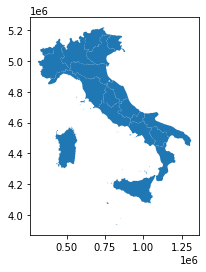

In [80]:
%matplotlib inline
df_regioni.plot()


### 11.3 Prendiamo statistiche da visualizzare


Nel nostro esempio, estraiamo statistiche sulla popolazione delle regioni italiane da una pagina HTML. Metteremo poi i dati estratti in un dataframe Pandas (non GeoPandas) chiamato `df_popolazione`. Per comodità abbiamo salvato tale pagina nel file [popolazione.html](popolazione.html) (se volete vedere la versione online, andate su questo sito: https://www.tuttitalia.it/regioni/popolazione)

<div class="alert alert-warning">

**ATTENZIONE**: Per il momento puoi ignorare il codice che segue, ci serve solo per caricare i dati nel dataframe `df_popolazione`

</div>

In [81]:
import pandas as pd


# prende la riga di una tabella html, e ritorna un dizionario con i dati estratti
def estrai_dizionario(riga_html):
    colonne = riga_html.select('td')
    return dict(name=colonne[1].text,
                population=colonne[2].text.replace('.', '').replace(',', '.'),
                area=colonne[3].text.replace('.', '').replace(',', '.'))

# Estrae la popolazione per regione da popolazione.html, e restituisce un dataframe Pandas (non GeoPandas)
def estrai_popolazione():
    from bs4 import BeautifulSoup
    with open('popolazione.html', encoding='utf-8') as f:
        testo = f.read()        
        listona = []    # listona di dizionari, ogni dizionario rappresenta una riga
        # usiamo il parser html5lib invece di lxml perchè il sito è complesso 
        soup = BeautifulSoup(testo, 'html5lib')  
        righe_html = soup.select('table.ut tr')[1:21]
        for riga_html in righe_html:
            listona.append(estrai_dizionario(riga_html))
        return pd.DataFrame(listona)


Vediamo qui il contenuto del file: 

In [82]:
df_popolazione = estrai_popolazione()
df_popolazione 

,name,population,area
0,Lombardia,10019166,23863.65
1,Lazio,5898124,17232.29
2,Campania,5839084,13670.95
3,Sicilia,5056641,25832.39
4,Veneto,4906210,18345.35
5,Em.-Romagna,4448841,22452.78
6,Piemonte,4392526,25387.07
7,Puglia,4063888,19540.90
8,Toscana,3742437,22987.04
9,Calabria,1965128,15221.90


Se compariamo i nomi in questa tabella con il dataframe della prima, notiamo subito che parecchi nomi non sono identici. Per esempio, nello shapefile troviamo `TRENTINO-ALTO ADIGE/SUDTIROL` mentre nelle statistiche c'è `Trentino-AA`. Volendo creare una tabella unica, occorrerà quindi fare integrazione dati cercando di ottenere un _matching_ tra le righe dei due dataset. Per venti regioni potremmo farla a mano ma chiaramente farlo per migliaia di righe sarebbe estremamente oneroso. Per agevolare questa operazione, ci conviene eseguire una cosiddetta _fuzzy join_, che cerca stringhe simili nei due dataset e in base ad un misura di similarità tra stringhe stabilisce come associare righe della prima tabella a righe della seconda.

Per 

In [83]:

def fuzzy_join(df_geo, df_right, name_left, name_right):
    """ Prende:
         - un data frame di geo pandas df_geo che contiene una colonna chiamata name_left 
         - un'altro dataframe generico df_right che contiene una colonna chiamata name_right
        Ritorna :
        - un nuovo dataframe che è la join dei due dataframe in base alla similirità tra 
          le colonne name_left e name_right
          
          ATTENZIONE: a volte l'agoritmo di similarità può confondersi e considerare uguale due nomi 
                      che invece dovrebbero essere distinti ! 
                      Per quanto possibile, verificare sempre i risultati manualmente.
    """
    from functools import partial
    from itertools import product
    import difflib
    import heapq
    #from pprint import pprint

    df1 = df_geo.set_index(name_left)
    df1.index = df1.index.str.lower()
    df2 = df_right.set_index(name_right)
    df2.index = df2.index.str.lower()


    def get_matcher_smart(dfl, dfr):
        heap = []
        for l, r in product(dfl.index, dfr.index):
            sm = difflib.SequenceMatcher(lambda x: ' .\n\t', l, r)
            heapq.heappush(heap, (1. - sm.quick_ratio(), l, r))
        ass_l, ass_r, ass_map = set(), set(), {}
        while len(ass_map) < len(dfl):
            score, l, r = heapq.heappop(heap)
            if not (l in ass_l or r in ass_r):
                ass_map[l] = r
                ass_l.add(l)
                ass_r.add(r)
        #pprint(ass_map)
        return dfl.index.map(lambda x: ass_map[x])

    df1.index = get_matcher_smart(df1, df2)

    return df1.join(df2)



In [84]:
tabellona = fuzzy_join(df_regioni, df_popolazione, 'NOME_REG', 'name')

tabellona

,COD_REG,SHAPE_Leng,SHAPE_Area,geometry,population,area
NOME_REG,,,,,,
piemonte,1,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",4392526,25387.07
v. d'aosta,2,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5...",126883,3260.90
lombardia,3,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",10019166,23863.65
trentino-aa,4,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5...",1062860,13605.50
veneto,5,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",4906210,18345.35
friuli vg,6,6.674897e+05,7.864294e+09,"MULTIPOLYGON (((852211.994 5080672.916, 852270...",1219191,7924.36
liguria,7,8.342245e+05,5.415465e+09,"MULTIPOLYGON (((400403.625 4851436.938, 400257...",1565307,5416.21
em.-romagna,8,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723...",4448841,22452.78
toscana,9,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553...",3742437,22987.04


<AxesSubplot:>

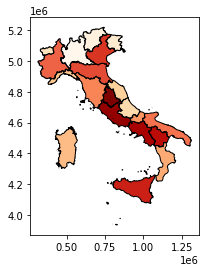

In [85]:
tabellona.plot(column='population', cmap='OrRd', edgecolor='k', legend=False)


### 11.4 Esempio di integrazione


<div class="alert alert-warning">


**ATTENZIONE: QUESTA PARTE E' INCOMPLETA**
</div>

Vediamo l'esempio di integrazione completo. Ti serviranno anche `requests`, `beautifulsoup4`, e `html5lib`. Installali così:


Anaconda:

- `conda install requests beautifulsoup4 html5lib`

Linux/Mac (`--user` installa nella propria home):


- ``` python3 -m pip install --user requests beautifulsoup4 html5lib ```


Per fare un esempio di integrazione, useremo una pagina HTML con i dati delle regioni italiane:

* https://www.tuttitalia.it/regioni/popolazione/

Per capire come estrarre la popoloziona dall'HTML, guarda il tutorial sull'[estrazione](https://it.softpython.org/extraction/extraction-sol.html)


Nel menu basi territoriali qua invece abbiamo dei file geografici in formato shapefile delle regioni: 

* basi territoriali https://www.istat.it/it/archivio/104317



In [86]:
# Scarica la pagina HTML della popolazione, e la salva nel file 'popolazione.html'
def scarica_popolazione():
    from bs4 import BeautifulSoup
    import requests

    r = requests.get("https://www.tuttitalia.it/regioni/popolazione/")
    if r.status_code == 200:
        testo = r.text
        with open('popolazione.html', 'w', encoding='utf-8') as f:
            f.write(testo)
            print("Ho salvato il file 'popolazione.html'")
    else:
        # se il codice non è 200, qualcosa è probabilmente andato storto
        # e blocchiamo l'esecuzione dello script        
        raise Exception('Errore durante lo scaricamento : %s' % r)     

# scarica_popolazione()

## Prosegui

Continua con  [altri esercizi](https://it.softpython.org/pandas/pandas2-sol.html)